In [2]:
import pandas as pd, numpy as np
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Monte Carlo

$\frac{S_{t+dt}-S_t}{S_t}=\mu dt+\sigma\sqrt{dt}\xi $

In [3]:
p = erk.gbm(10, n_scenarios=3)
p

,0,1,2
0,100.000000,100.000000,100.000000
1,106.442475,109.545020,99.671459
2,109.455414,109.087428,96.377784
3,103.162258,108.558476,98.849900
4,103.447715,122.824639,92.149880
...,...,...,...
115,156.713242,307.145863,166.531339
116,146.211210,312.348893,170.266797
117,150.746638,316.131431,174.747052
118,149.281534,328.045513,177.423090


# GBM Interactive plots

In [4]:
def show_gbm(n_scenarios, mu, sigma):
    """ 
    Draw results of a stock price evolution under a GBM model
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # Draw a dot at the origin
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

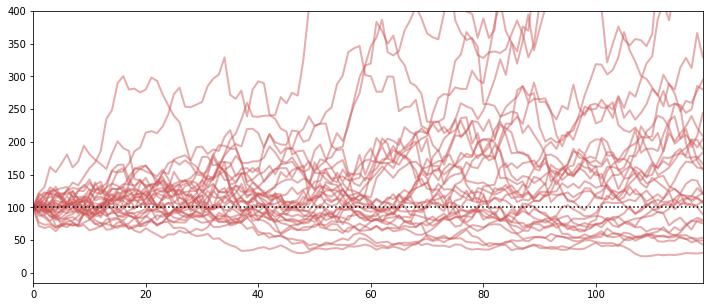

In [5]:
show_gbm(30, 0.07, 0.3)

In [6]:
gbm_controls = widgets.interactive(show_gbm, 
                                  n_scenarios = (1, 20, 1),
                                  mu = (-0.2, 0.2, 0.1),
                                  sigma = (0, 0.3, 0.01))

In [7]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [8]:
n_scenarios=50; mu=0.07; sigma=0.15; m=3; floor=0.; riskfree_rate=0.03; y_max=100

In [9]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0, riskfree_rate=0.03, y_max=100, steps_per_year=12):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    
    start = 100
    sim_ret = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_ret)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate = riskfree_rate, m=m, start=start, floor=floor)
    # Run the backtest
    btr = erk.run_cppi(risky_r=risky_r, riskfree_rate = riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    
    # calculate terminal wealth stats
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred", figsize=(12,6))
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(0.7, 0.9), xycoords="axes fraction", fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(0.7, 0.85), xycoords="axes fraction", fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(0.7, 0.6), xycoords="axes fraction", fontsize=24)
                         
                         

In [10]:
erk.gbm()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.916893,104.602586,100.088981,104.615828,104.429759,109.159350,97.390467,102.344587,99.807371,97.820148,...,96.926007,92.258745,105.951807,106.639768,101.344476,100.574948,103.966896,106.938214,94.016181,105.389302
2,99.033529,102.738798,100.975845,111.536361,104.641192,113.202904,100.929203,104.344101,100.143375,100.320932,...,97.009966,89.739701,107.821593,100.341672,108.158715,105.353369,110.447489,98.956247,90.065840,108.767792
3,95.996752,103.471145,108.153086,111.203623,108.498556,107.796377,106.281339,107.842422,98.764938,102.301407,...,98.663499,86.731124,109.634008,100.166894,108.892470,105.821164,114.308845,106.985392,92.022199,117.173903
4,99.265968,104.078508,109.078628,106.848672,107.398819,108.387433,100.726622,102.698523,112.317356,95.842072,...,92.515476,84.419048,113.215524,91.689364,113.311689,105.037888,108.267708,107.149298,92.808015,121.415476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,229.355880,195.433652,511.459210,198.288978,76.570684,349.273311,109.680161,157.514631,243.254419,388.317961,...,175.035767,821.098999,277.795657,155.309161,356.306763,313.150762,243.035841,259.577404,220.728659,287.752858
116,236.052738,186.962911,530.098453,185.578284,75.407269,334.938698,117.045554,162.473030,250.471869,399.505922,...,185.334275,804.191948,264.517541,156.840503,367.019240,342.653462,247.238826,261.023991,220.358910,296.062233
117,218.580614,197.968598,524.553735,183.034462,74.646113,350.088680,119.224968,161.541363,260.193177,413.729892,...,176.957698,748.669854,279.826420,156.544450,373.823566,350.467763,248.741829,273.422342,235.805897,310.665171
118,214.600062,202.996336,517.730201,196.064616,77.534746,329.610270,118.734054,175.220750,268.754415,410.673507,...,164.126442,703.865460,288.586398,153.458617,370.474595,347.381515,234.633423,281.005032,232.367112,306.100491


In [11]:
cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=500, step=5, value=50),
                                   mu=(0.0, 0.2, 0.01),
                                   sigma=(0, 0.5, 0.05),
                                   floor=(0, 2, 0.1),
                                   m=(1, 5, 0.5),
                                   riskfree_rate=(0, 0.05, 0.01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Num of rebal in a year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=500, min=1, step=5), FloatSlider(valu…